In [1]:
import tweepy
import json
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
from config import (consumer_key, 
                    consumer_secret, 
                    access_token, 
                    access_token_secret)
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [4]:

target_users = ["@BBCWorld", "@CBSNews", "@CNN", "@FoxNews","@nytimes"]


outlets = []
compound_list = []
positive_list = []
negative_list = []
neutral_list = []
tweet_counter = []

for target in target_users:

        public_tweets = api.user_timeline(target, count=100, result_type="recent") 
        
        tweet_number = 100

        
        for tweet in public_tweets: 

            
            results = analyzer.polarity_scores(tweet['text'])
            compound = results['compound']
            pos = results['pos']
            neu = results['neu']
            neg = results['neg']
            
            tweet_number -= 1
            
            
            
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)
            outlets.append(target)
            tweet_counter.append(tweet_number)
            
            sentiments = {"User": outlets,
                          "Date": tweet["created_at"],
                          "Compound": compound_list,
                          "Positive": positive_list,
                          "Negative": neutral_list,
                          "Neutral": negative_list,
                         "Tweet_Count": tweet_counter}

In [5]:
sentiments_pd = pd.DataFrame.from_dict(sentiments)

sentiments_pd.head()

,User,Date,Compound,Positive,Negative,Neutral,Tweet_Count
0,@BBCWorld,Sat Sep 15 02:32:05 +0000 2018,-0.6369,0.000,0.656,0.344,99
1,@BBCWorld,Sat Sep 15 02:32:05 +0000 2018,-0.1531,0.000,0.814,0.186,98
2,@BBCWorld,Sat Sep 15 02:32:05 +0000 2018,-0.4767,0.000,0.659,0.341,97
3,@BBCWorld,Sat Sep 15 02:32:05 +0000 2018,0.0000,0.000,1.000,0.000,96
4,@BBCWorld,Sat Sep 15 02:32:05 +0000 2018,0.3400,0.211,0.789,0.000,95


In [6]:
sentiments_pd.to_csv('sentiments.csv')

In [7]:
user_sentiments = sentiments_pd.pivot(index="Tweet_Count", columns="User", values="Compound")
user_sentiments.head()

User,@BBCWorld,@CBSNews,@CNN,@FoxNews,@nytimes
Tweet_Count,,,,,
0,0.0000,0.0000,-0.3612,-0.6597,0.7269
1,-0.5256,-0.6124,0.2263,0.0000,-0.1531
2,0.4588,0.4215,0.2023,0.0191,0.3400
3,0.0000,-0.2500,-0.2732,0.6435,0.0000
4,0.1280,0.5859,0.4019,0.0000,0.3612


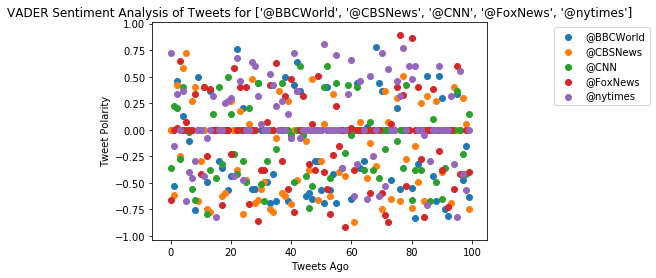

In [8]:
x_values = np.arange(100)

for user in target_users:
    
    plt.scatter(x_values, user_sentiments[user], marker="o", alpha=1)



plt.legend(loc='upper right', bbox_to_anchor=(1.5, 1))


plt.title(f"VADER Sentiment Analysis of Tweets for {target_users}")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")

plt.savefig('news_sentiments_scatter.png')

plt.show()

In [10]:

grouped_news = sentiments_pd.groupby('User')

grouped_compound = grouped_news['Compound'].mean()

grouped_compound

User
@BBCWorld   -0.120087
@CBSNews    -0.157407
@CNN        -0.089240
@FoxNews    -0.073907
@nytimes     0.065276
Name: Compound, dtype: float64

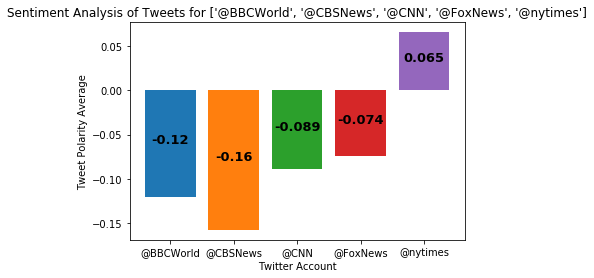

In [11]:

x_values = np.arange(len(target_users))

plot_data = zip(x_values, target_users)

for x, user in plot_data:
    
    y = grouped_compound[user]
    
    plt.bar(x, y)
    plt.text(x, y/2, '{:.2}'.format(y),
             horizontalalignment='center', color='black',
             fontsize=13, weight='bold')


plt.xticks(x_values, target_users)


plt.title(f"Sentiment Analysis of Tweets for {target_users}")
plt.ylabel("Tweet Polarity Average")
plt.xlabel("Twitter Account")
plt.savefig('bar.png')
plt.show()